In [6]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from random import randint
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from collections import defaultdict
from sklearn import metrics, cross_validation

/Users/alnick06/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/alnick06/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Project Summary
## In this project I was tasked with scraping Data Science job information from a job aggregator website. I used glassdoor.com for this project to scrape my desired features. I collected salary information on data science jobs in a variety of markets. Then using the location, title, and summary of the position, I attempted to predict a corresponding salary for that job. While most listings do not come with salary information being to able extrapolate or predict the expected salaries for other listings will be extremely useful for negotiations with potential employers. Normally I could have used Linear regression for this task; however, I converted this into a classification problem uses LogisticRegression.

In [ ]:
driver = webdriver.Chrome("/Users/alnick06/Desktop/Packages/chromedriver")

In [ ]:
#set to scrape
loc1=[]
title1=[]
company=[]
salary_list=[]
urls=[]
ratings_list=[]


#still troubleshooting
templist=[]
ter15=[]

appl1=[]

max2=[]
min1=[]

org1=[]
len1=[]



for t in range(1,31):
    b=('https://www.glassdoor.com/Job/florida-data-scientist-jobs-SRCH_IL.0,7_IS3318_KO8,22_IP'+str(t)+'.htm')
    driver.get(b)
    soup=BeautifulSoup(driver.page_source,'lxml')
    gdf=soup.findAll('jl', class_='jlGrid hover')
    sleep(randint(1,7))


# for x in soup.findAll("jl", class_="jlGrid hover"):
    for x in soup.findAll("li", class_="jl"):
        loc1.append(x['data-job-loc'])
        title1.append(x['data-normalize-job-title'])
        urls.append(x.find("a")["href"])
    
        text_pull=str(x.find("div", class_="flexbox empLoc").text)
        g=str(text_pull).split(" –")
        company.append(g[0].strip(" "))
    
        try:
            ratings_list.append(x.find("span",class_="compactStars").text)
        except:
            ratings_list.append("Not There")
        for s in x.findAll('i',class_='info infoSalEst infoIcon _ok'):
            salary_list.append(s['data-displayed-med-salary'])
        if len(salary_list)== len(title1):
            pass
        else:
             salary_list.append('Not There')



## Web Scraper
### My webscraper scraped 30 different pages for fourteen different states for a total of seven unique features including salary. I selected and parsed data from at least  11000 postings from multiple states and created a datedframe where I could easily visualize,clean and analyze the data.

In [7]:
df=pd.DataFrame({"Job Title":title1, "Location":loc1, "Company Name":company, "Salary":salary_list, "Urls":urls,"Stars":ratings_list})

NameError: name 'title1' is not defined

In [28]:
df1=pd.read_csv('Arizona data.csv')

In [29]:
df2=pd.read_csv('New York data.csv')

In [30]:
df3=pd.read_csv('Missouri data.csv')

In [31]:
df4=pd.read_csv('D.C data.csv')

In [32]:
df5=pd.read_csv('Georgia data.csv')

In [33]:
df6=pd.read_csv('Colorado data.csv')

In [34]:
df7=pd.read_csv('Canada data.csv')

In [35]:
df8=pd.read_csv('Mass data.csv')

In [36]:
df9=pd.read_csv('Oregon data.csv')

In [37]:
df10=pd.read_csv('North Carolina data.csv')

In [38]:
df11=pd.read_csv('Texas data.csv')

In [39]:
df12=pd.read_csv('Conneticut data.csv')

In [40]:
df13=pd.read_csv('Washington data.csv')

In [41]:
df14=pd.read_csv('Florida data.csv')

In [42]:
tdf=(pd.concat([df1,df2,df3,df4,df5,df6,df6,df7,df8,df9,df10,df11,df12,df13,df14],ignore_index=True))

# Cleaning the data
## After creating the dataframe from the scraped data from glassdoor it came time for cleaning and reorganizing the data so eventually I could create a proper classification model.

In [43]:
tdf2=tdf[~tdf['Salary'].isin(['Not There'])]#dropping all not theres

In [44]:
lister=[]
for x in tdf2['Salary']: #turning the strings into integers
    lister.append(int(x))
tdf2['Salary']=lister

/Users/alnick06/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [45]:
max(tdf2['Salary'])

277000

In [46]:
min(tdf2['Salary'])

27000

In [47]:
tdf2.dropna()

Unnamed: 0                                   Company Name  \
0               0                                            IBM   
1               1                                         Disney   
2               2                                 Dignity Health   
3               3              Dignity Health Medical Foundation   
4               4                                            IBM   
6               6                                       mckesson   
7               7                                 Northern Trust   
9               9                            Silicon Valley Bank   
10             10                                      U.S. Bank   
12             12                                           USAA   
13             13                                      DriveTime   
18             18                                         Cyient   
19             19                                      IntraEdge   
21             21                    Phoenix Children's Hospital   
23             23                                     SPINS, LLC   
24             24                                            IBM   
26             26                       Penske Media Corporation   
27             27  International Cruise & Excursions, Inc. (ICE)   
28             28                                        Carvana   
29             29                                   Maine Pointe   
30             30                                         PayPal   
32             32                                           Lyft   
33             33                                       McKesson   
35             35                         Matrix Medical Network   
36             36                 Mitsubishi UFJ Financial Group   
37             37                               American-Express   
38             38                                            IBM   
40             40                               The Money Source   
41             41                               American Express   
42             42                                            IBM   
...           ...                                            ...   
10424         745                         Hotwire Communications   
10425         746                                Infosys Limited   
10426         747                                        Verizon   
10428         749                          The Hertz Corporation   
10431         752                                 Orlando Health   
10432         753                                Infosys Limited   
10436         757                                 JPMorgan Chase   
10437         758              First Coast Service Options, Inc.   
10438         759                                         Bealls   
10439         760                Open Systems Technologies (NYC)   
10440         761                                Softpath System   
10441         762                              FARO Technologies   
10445         766                                Suncoast Center   
10446         767                  Forfeiture Support Associates   
10447         768                             Catalina Marketing   
10450         771                          SCIO Health Analytics   
10454         775                            Envision Healthcare   
10457         778                          Norwegian Cruise Line   
10458         779                               Hertz Rent a Car   
10459         780                                    SS&C Advent   
10460         781                          Carnival Cruise Lines   
10466         787                                       Datavail   
10468         789                                     ACTS, Inc.   
10469         790                                Advent Software   
10470         791                                   Office Depot   
10475         796                            Envision Healthcare   
10476         797                                        Pearso

In [48]:
lister2=[]
for x in tdf2['Job Title']:
    lister2.append(len(x))


In [49]:
tdf2['Job Title Length']=lister2

/Users/alnick06/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
tdf2.reset_index(inplace=True)

### Here I created a distrubution plot in order to see if the salary data was evenly distrubuted and thus could be used in a effecient model.

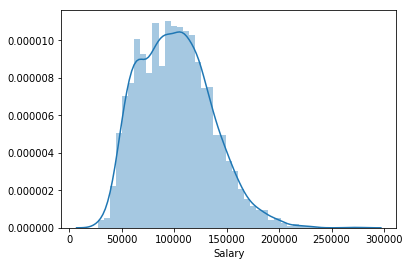

In [51]:
sns.distplot(tdf2['Salary'])

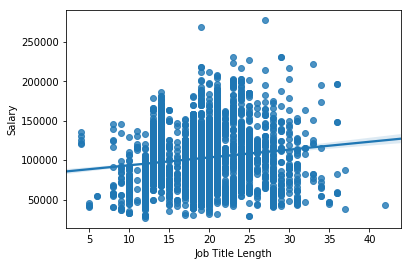

In [56]:
sns.regplot(x=tdf2['Job Title Length'],y=tdf2['Salary'])

## Here I could see the top ten cities and states that held the most data scientist positions. I used this to shape my EDA and visualized the amount of high and low salaries per state. NY was an obvious outlier for higher paid jobs.

In [463]:
tdf2['Location'].value_counts()

Seattle, WA                        464
New York, NY                       461
Charlotte, NC                      215
Saint Louis, MO                    188
Washington, DC                     187
Atlanta, GA                        170
Denver, CO                         160
Phoenix, AZ                        131
Boston, MA                         112
Boulder, CO                        110
Portland, OR                       101
Raleigh, NC                         92
Tampa, FL                           90
Cambridge, MA                       88
Hartford, CT                        69
Durham, NC                          65
Beaverton, OR                       61
Colorado Springs, CO                58
Jacksonville, FL                    56
Austin, TX                          56
Bellevue, WA                        54
Miami, FL                           49
Redmond, WA                         49
Houston, TX                         45
Kansas City, MO                     43
Dallas, TX               

In [465]:
tdf3['States'].value_counts()

WA          631
NC          518
CO          486
NY          466
FL          422
MA          316
MO          297
TX          263
CT          257
AZ          232
OR          212
GA          207
VA          193
DC          187
MD           82
NJ           32
Arapahoe     12
Spokane       1
Name: States, dtype: int64

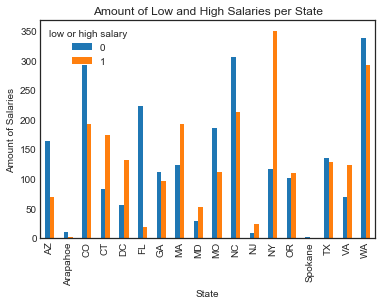

In [1063]:
%matplotlib inline
pd.crosstab(tdf3['States'],target_data).plot(kind='bar')
plt.title('Amount of Low and High Salaries per State')
plt.xlabel('State')
plt.ylabel('Amount of Salaries')
plt.savefig('STATE SALARIES')

## Feature Creation
### Here I created some binary classifciation columns for things such a if a job title has the word data in it or not or how long the length of the job title is and a column with salary mean.

In [26]:
tdf3=tdf2[~tdf2['Job Title'].isin(['Medical'])]#drop titles with medical

In [27]:
lister2=[]
lister1='data'
for x in tdf3['Job Title']:
    if lister1 in x.lower():
        lister2.append(1)
    else:
        lister2.append(0)
tdf3['Contains The Word Data']=lister2  #True false if title has data or not

In [28]:
lister3=[]
lister4='entry'
lister5='junior'
lister6='associate'
for x in tdf3['Job Title']:
    if lister4 in x.lower():
        lister3.append(1)
    elif lister5 in x.lower():
        lister3.append(1)
    elif lister6 in x.lower():
        lister3.append(1)
    else:
        lister3.append(0)
#Run this to combine features entry level positions

In [29]:
lister8=[]
lister9=[]
lister10=[]
for x in tdf3['Job Title']:
    if "entry" in x.lower():
        lister8.append(1)
    else:
        lister8.append(0)
    if "junior" in x.lower():
        lister9.append(1)
    else:
        lister9.append(0)
    if 'associate' in x.lower():
        lister10.append(1)
    else:
        lister10.append(0)
tdf3['Title Contains Entry']=lister8
tdf3['Title Contains Junior']=lister9
tdf3['Title Contains Associate']=lister10

In [30]:
location_list=[]
for o in tdf3["Location"]:
    location_list.append(o.split(', ')[1])
tdf3['States']=location_list

In [31]:
number=[]
for x in tdf3['Salary']: #turning the strings into integers
    number.append(int(x))
tdf3['Salary']=number

In [32]:
tdf3['Salary Mean']=tdf3['Salary'].mean()

## Dummying Columns
### Here is where I decided on dummying the state column with the string state name. By dummying the state column it creating a new column for every state. A 1 would show if it appeared in that specific index in the dataframe and a 0 when it was another state. An issue that I encountered was when I tried to dummy the job titles. It created a new column for each of the job titles which was way too many and would have been an issue of demensionality. I decided on dropping the column instead.

In [33]:
tdf4=pd.get_dummies(tdf3['States'])

In [34]:
print(tdf4.shape)
print(tdf3.shape)

(4814, 18)
(4814, 15)


In [35]:
newdf = tdf4.join(tdf3)

In [36]:
jobtitles=[]
lead='lead'
senior='senior'
for x in newdf['Job Title']:
    if lead in x.lower():
        jobtitles.append(1)
    elif senior in x.lower():
        jobtitles.append(1)
    else:
        jobtitles.append(0)
newdf['Senior & Lead Titles']=jobtitles

In [37]:
newdf.drop(['index','Location','Spokane','Arapahoe','Urls','Job Title','States','Company Name','Unnamed: 0'],axis=1,inplace=True) #Had to delete job titles

In [763]:
newdf.head()

AZ  CO  CT  DC  FL  GA  MA  MD  MO  NC  NJ  NY  OR  TX  VA  WA  Salary  \
0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  109000   
1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  134000   
2   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   89000   
3   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   72000   
4   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   96000   

  Stars  Job Title Length  Contains The Word Data  Title Contains Entry  \
0   3.6                26                       1                     1   
1   3.7                24                       1                     0   
2   3.7                21                       1                     0   
3   3.1                21                       1                     0   
4   3.6                21                       1                     0   

   Title Contains Junior  Title Contains Associate    Salary Mean  \
0                      0                         0  101134.399668   
1                      0                         1  101134.399668   
2                      1                         0  101134.399668   
3                      1                         0  101134.399668   
4                      0                         0  101134.399668   

   Senior & Lead Titles  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

In [764]:
newdf.rename(index=str, columns={'Salaries':'Salaries(Low-High)'})

AZ  CO  CT  DC  FL  GA  MA  MD  MO  NC  NJ  NY  OR  TX  VA  WA  Salary  \
0      1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  109000   
1      1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  134000   
2      1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   89000   
3      1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   72000   
4      1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   96000   
5      1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  109000   
6      1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  106000   
7      1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  110000   
8      1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   93000   
9      1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  110000   
10     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   94000   
11     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   96000   
12     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  111000   
13     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   65000   
14     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   60000   
15     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  122000   
16     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  137000   
17     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   76000   
18     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  117000   
19     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   68000   
20     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   63000   
21     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  100000   
22     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   78000   
23     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  101000   
24     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   76000   
25     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  120000   
26     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  122000   
27     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   94000   
28     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   94000   
29     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  122000   
30     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   43000   
31     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  146000   
32     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   98000   
33     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  122000   
34     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   87000   
35     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  102000   
36     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  120000   
37     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  127000   
38     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  127000   
39     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  112000   
40     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   98000   
41     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   78000   
42     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  122000   
43     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  110000   
44     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   88000   
45     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   69000   
46     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   89000   
47     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   82000   
48     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   89000   
49    

In [834]:
totaldf=newdf.copy()

In [835]:
print(totaldf.shape)

(4814, 25)


In [767]:
pd.set_option('display.max_columns',30)

## Preparing the Model
### Now it came down to creating and running my first model. I took my dataframe and excluded the target column and set it equal to my X and the target column (Salary) equal to y. Also during this preprocessing stage I used standard scaler to scale any features that would not behave well within the model because they were not normally distrubuted. 

In [836]:
totaldf=totaldf[~totaldf['Stars'].isin(['Not There'])]

In [837]:
withoutsal=totaldf.loc[:, totaldf.columns != 'Salary']

In [838]:
withoutsal.columns

Index(['AZ', 'CO', 'CT', 'DC', 'FL', 'GA', 'MA', 'MD', 'MO', 'NC', 'NJ', 'NY',
       'OR', 'TX', 'VA', 'WA', 'Stars', 'Job Title Length',
       'Contains The Word Data', 'Title Contains Entry',
       'Title Contains Junior', 'Title Contains Associate', 'Salary Mean',
       'Senior & Lead Titles'],
      dtype='object')

In [839]:
scaler = StandardScaler()
scaler.fit(withoutsal)
StandardScaler(copy=True, with_mean=True, with_std=True)
(scaler.mean_)
print(scaler.transform(withoutsal))

[[ 4.45127541 -0.33533258 -0.2376365  ... -0.11706582  1.
  -0.53727326]
 [ 4.45127541 -0.33533258 -0.2376365  ...  8.54220292  1.
  -0.53727326]
 [ 4.45127541 -0.33533258 -0.2376365  ... -0.11706582  1.
  -0.53727326]
 ...
 [-0.22465471 -0.33533258 -0.2376365  ... -0.11706582  1.
  -0.53727326]
 [-0.22465471 -0.33533258 -0.2376365  ... -0.11706582  1.
  -0.53727326]
 [-0.22465471 -0.33533258 -0.2376365  ... -0.11706582  1.
  -0.53727326]]


## I needed to binarize my salaries to run a proper logisitic model so I used .describe() to what the median was and what was the standard deviation was. I then doubled that and got rid of anything that was 2 standard deviations above and below the mean.

In [800]:
totaldf['Salary'].std()

34391.62250988784

In [854]:
emptylistq=[]
for x in totaldf1['Salary']:
    if x in range(31268,98001):
        emptylistq.append(0)
    elif x in range(98002,168783):
        emptylistq.append(1)
    else:
        emptylistq.append('No dice')
totaldf1['low or high salary']=emptylistq

In [234]:
pd.options.display.max_rows = 5000

In [814]:
totaldf1['Salary'].describe()

count      4634.000000
mean      98241.260250
std       30625.461655
min       32000.000000
25%       73000.000000
50%       98000.000000
75%      121000.000000
max      168000.000000
Name: Salary, dtype: float64

## Running the First Model 
## I took the whole dataframe and ran a logisitic model with all of my features and my target column which of course is the high and low salaries.

In [680]:
X=data_vals
y=target_data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)
print(data_vals.columns)

Index(['AZ', 'CO', 'CT', 'DC', 'FL', 'GA', 'MA', 'MD', 'MO', 'NC', 'NJ', 'NY',
       'OR', 'TX', 'VA', 'WA', 'Stars', 'Job Title Length',
       'Contains The Word Data', 'Title Contains Entry',
       'Title Contains Junior', 'Title Contains Associate', 'Salary Mean',
       'Senior & Lead Titles', 'intercept'],
      dtype='object')


In [681]:
scaler = StandardScaler()
scaler.fit(data_vals)
StandardScaler(copy=True, with_mean=True, with_std=True)
(scaler.mean_)
print(scaler.transform(data_vals))

[[ 4.45127541 -0.33533258 -0.2376365  ...  1.         -0.53727326
   0.        ]
 [ 4.45127541 -0.33533258 -0.2376365  ...  1.         -0.53727326
   0.        ]
 [ 4.45127541 -0.33533258 -0.2376365  ...  1.         -0.53727326
   0.        ]
 ...
 [-0.22465471 -0.33533258 -0.2376365  ...  1.         -0.53727326
   0.        ]
 [-0.22465471 -0.33533258 -0.2376365  ...  1.         -0.53727326
   0.        ]
 [-0.22465471 -0.33533258 -0.2376365  ...  1.         -0.53727326
   0.        ]]


In [682]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 0, 1])

In [664]:
print(clf.coef_)

[[-5.71932829e-01 -3.09722978e-01 -6.39180237e-02  1.91278339e-01
  -1.34851438e+00 -8.74757750e-02  5.65595169e-01  2.71192863e-01
  -7.40065779e-01 -5.00920526e-01  1.56025872e-01  1.08628808e+00
  -1.41236196e-02  1.83061129e-01  6.28005876e-01  5.42949624e-01
   4.11309381e-01  3.06496617e-02  1.01862465e+00 -1.73876376e-01
  -3.06821480e-01 -2.45928053e-01 -2.91580833e-05  1.37203134e+00
  -2.88289101e-10]]


##  Inputing the results in the confusin matrix I could see that I was getting a decent prediction of true positives(640) and true negatives(539). However, I knew I was going to have false postives (183) and false negatives (225). My next task after running the initial model was to minimize the false postives and negatives.

In [665]:
from sklearn.metrics import confusion_matrix
conmat = np.array(confusion_matrix(y_test, y_pred, labels=[0,1]))
confusion = pd.DataFrame(conmat, index=['is low', 'is high'],
                         columns=['predicted low','predicted high'])
print(confusion)

         predicted low  predicted high
is low             640             183
is high            225             539


## The classification report showed across the board a 74% accuracy with being able to correctly classify whether based on the features a job would be low or high.

In [666]:
target_names=['Low','High']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

        Low       0.74      0.78      0.76       823
       High       0.75      0.71      0.73       764

avg / total       0.74      0.74      0.74      1587



## Now predict proba will show how probable it is to correctly classify a feature as a high or low salary. Changing the threshold of low values  from being classified as a proablity as 50% to 10% making the model more sensitive to picking up low values.

In [667]:
Y_pp = pd.DataFrame(clf.predict_proba(X_test), columns=['Low_Prob','High_Prob'])
print(Y_pp.iloc[0:10])
print(len(X_test), len(Y_pp))

   Low_Prob  High_Prob
0  0.248437   0.751563
1  0.643669   0.356331
2  0.122690   0.877310
3  0.539473   0.460527
4  0.253686   0.746314
5  0.712717   0.287283
6  0.323303   0.676697
7  0.447208   0.552792
8  0.476407   0.523593
9  0.481215   0.518785
1587 1587


In [668]:
Y_pp['pred_class_thresh50'] = y_pred
print(Y_pp.iloc[0:10])

   Low_Prob  High_Prob  pred_class_thresh50
0  0.248437   0.751563                    1
1  0.643669   0.356331                    0
2  0.122690   0.877310                    1
3  0.539473   0.460527                    0
4  0.253686   0.746314                    1
5  0.712717   0.287283                    0
6  0.323303   0.676697                    1
7  0.447208   0.552792                    1
8  0.476407   0.523593                    1
9  0.481215   0.518785                    1


In [669]:
Y_pp['pred_class_thresh10'] = [1 if x >= 0.01 else 0 for x in Y_pp.Low_Prob.values]
print(Y_pp.iloc[0:10])

   Low_Prob  High_Prob  pred_class_thresh50  pred_class_thresh10
0  0.248437   0.751563                    1                    1
1  0.643669   0.356331                    0                    1
2  0.122690   0.877310                    1                    1
3  0.539473   0.460527                    0                    1
4  0.253686   0.746314                    1                    1
5  0.712717   0.287283                    0                    1
6  0.323303   0.676697                    1                    1
7  0.447208   0.552792                    1                    1
8  0.476407   0.523593                    1                    1
9  0.481215   0.518785                    1                    1


## My first ROC curve shows a .80 AUC which is pretty good but I thought it could be improved upon. 

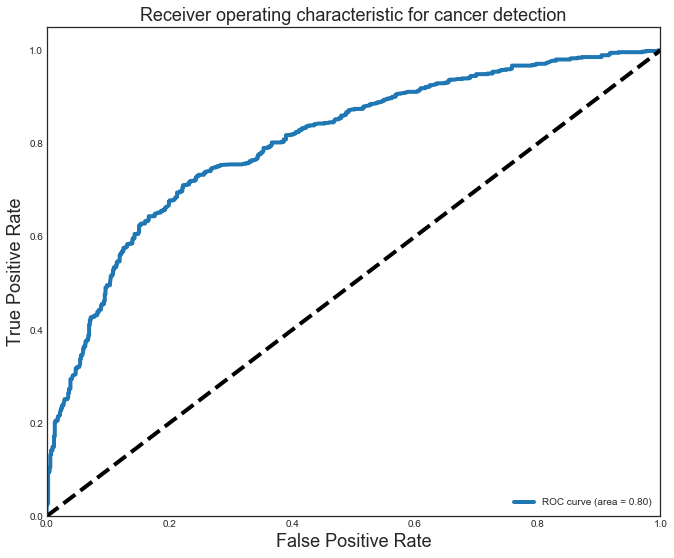

In [670]:
plt.style.use('seaborn-white')
%matplotlib inline


Y_score = clf.decision_function(X_test)

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Total Data Frame Attempt', fontsize=18)
plt.legend(loc="lower right")
plt.show()

## Plotting the new threshold in the confusion matrix one can see that the low salaries are being very accurately predicted at the exspense of false and true and negatives.

In [285]:
conmat_10=np.array(confusion_matrix(y_test,Y_pp.pred_class_thresh10.values, labels=[1,0]))
confusion_10 = pd.DataFrame(conmat_10, index=['is_low', 'is_high'],
                         columns=['predicted_low','predicted_high'])
print(confusion_10)

         predicted_low  predicted_high
is_low             761               0
is_high            826               0


In [671]:
predicted = cross_validation.cross_val_predict(LogisticRegression(),data_vals,target_data, cv=10)
print(metrics.accuracy_score(target_data, predicted))

0.6131447587354409


In [672]:
predicted = cross_validation.cross_val_predict(clf, X, y, cv=10)
print(metrics.accuracy_score(y, predicted))
print(metrics.classification_report(y, predicted))

0.6131447587354409
             precision    recall  f1-score   support

          0       0.62      0.62      0.62      2450
          1       0.60      0.61      0.61      2358

avg / total       0.61      0.61      0.61      4808



In [843]:
onedf=totaldf[~(totaldf['Salary'] <= 31268)]

In [851]:
totaldf1=onedf[~(onedf['Salary'] >= 168782)].reset_index(drop=True)


In [575]:
pd.DataFrame(scaler.transform(data_vals),columns=['AZ', 'CO', 'CT', 'DC', 'FL', 'GA', 'MA', 'MD', 'MO', 'NC', 'NJ', 'NY',
       'OR', 'TX', 'VA', 'WA', 'Stars', 'Job Title Length',
       'Contains The Word Data', 'Title Contains Entry',
       'Title Contains Junior', 'Title Contains Associate', 'Salary Mean',
       'Senior & Lead Titles', 'intercept']).describe()

AZ            CO            CT            DC            FL  \
count  4.808000e+03  4.808000e+03  4.808000e+03  4.808000e+03  4.808000e+03   
mean  -1.324645e-14  1.141738e-14  1.080261e-14  6.873396e-15 -9.677783e-15   
std    1.000104e+00  1.000104e+00  1.000104e+00  1.000104e+00  1.000104e+00   
min   -2.246547e-01 -3.353326e-01 -2.376365e-01 -2.011652e-01 -3.097827e-01   
25%   -2.246547e-01 -3.353326e-01 -2.376365e-01 -2.011652e-01 -3.097827e-01   
50%   -2.246547e-01 -3.353326e-01 -2.376365e-01 -2.011652e-01 -3.097827e-01   
75%   -2.246547e-01 -3.353326e-01 -2.376365e-01 -2.011652e-01 -3.097827e-01   
max    4.451275e+00  2.982114e+00  4.208108e+00  4.971039e+00  3.228069e+00   

                 GA            MA            MD            MO            NC  \
count  4.808000e+03  4.808000e+03  4.808000e+03  4.808000e+03  4.808000e+03   
mean  -2.255279e-15  4.061966e-16  3.280607e-15 -6.823669e-16  1.243697e-14   
std    1.000104e+00  1.000104e+00  1.000104e+00  1.000104e+00  1.000104e+00   
min   -2.121090e-01 -2.652306e-01 -1.317225e-01 -2.547446e-01 -3.474851e-01   
25%   -2.121090e-01 -2.652306e-01 -1.317225e-01 -2.547446e-01 -3.474851e-01   
50%   -2.121090e-01 -2.652306e-01 -1.317225e-01 -2.547446e-01 -3.474851e-01   
75%   -2.121090e-01 -2.652306e-01 -1.317225e-01 -2.547446e-01 -3.474851e-01   
max    4.714558e+00  3.770304e+00  7.591716e+00  3.925501e+00  2.877821e+00   

                 NJ            NY            OR            TX            VA  \
count  4.808000e+03  4.808000e+03  4.808000e+03  4.808000e+03  4.808000e+03   
mean   4.637046e-15 -9.624026e-15 -2.029436e-15  7.736428e-15  3.342573e-15   
std    1.000104e+00  1.000104e+00  1.000104e+00  1.000104e+00  1.000104e+00   
min   -8.185455e-02 -3.276031e-01 -2.147721e-01 -2.405531e-01 -2.044998e-01   
25%   -8.185455e-02 -3.276031e-01 -2.147721e-01 -2.405531e-01 -2.044998e-01   
50%   -8.185455e-02 -3.276031e-01 -2.147721e-01 -2.405531e-01 -2.044998e-01   
75%   -8.185455e-02 -3.276031e-01 -2.147721e-01 -2.405531e-01 -2.044998e-01   
max    1.221679e+01  3.052474e+00  4.656098e+00  4.157087e+00  4.889981e+00   

                 WA         Stars  Job Title Length  Contains The Word Data  \
count  4.808000e+03  4.808000e+03      4.808000e+03            4.808000e+03   
mean   2.153498e-14  7.717066e-16      4.776407e-17            7.167958e-16   
std    1.000104e+00  1.000104e+00      1.000104e+00            1.000104e+00   
min   -3.886713e-01 -4.179684e+00     -2.686927e+00           -1.294438e+00   
25%   -3.886713e-01 -6.026993e-01     -7.230546e-01           -1.294438e+00   
50%   -3.886713e-01  2.853325e-02      6.249427e-02            7.725359e-01   
75%   -3.886713e-01  4.493550e-01      6.516559e-01            7.725359e-01   
max    2.572868e+00  2.974285e+00      4.775788e+00            7.725359e-01   

       Title Contains Entry  Title Contains Junior  Title Contains Associate  \
count          4.808000e+03           4.808000e+03              4.808000e+03   
mean           7.649178e-16           7.428022e-16              2.277423e-16   
std            1.000104e+00           1.000104e+00              1.000104e+00   
min           -8.055699e-02          -1.004193e-01             -1.170658e-01   
25%           -8.055699e-02          -1.004193e-01             -1.170658e-01   
50%           -8.055699e-02          -1.004193e-01             -1.170658e-01   
75%           -8.055699e-02          -1.004193e-01             -1.170658e-01   
max            1.241357e+01           9.958246e+00              8.542203e+00   

       Salary Mean  Senior & Lead Titles  intercept  
count       4808.0          4.808000e+03     4808.0  
mean           1.0         -9.482616e-16        0.0  
std            0.0          1.000104e+00        0.0  
min            1.0         -5.372733e-01        0.0  
25%            1.0         -5.372733e-01        0.0  
50%            1.0         -5.372733e-01        0.0  
75%            1.0         -5.372733e-01        0.0  
max            1

## I tried here to choose my new model features based upon the mean of the transformed total dataframe. I figured features with a high or low std would not be strong indicators to being able to predict a low or high salary.

In [633]:
pd.DataFrame(clf.coef_)

0         1         2         3         4         5         6   \
0 -0.435619 -0.257695  0.007412  0.051071 -0.949593 -0.015131  0.326277   

         7         8         9         10        11        12        13  \
0  0.100715 -0.449364 -0.338792  0.103036  0.800425 -0.039419  0.166975   

         14       15        16        17        18        19        20  \
0  0.493468  0.41959  0.478247  0.042748  1.291622 -0.073371 -0.152713   

         21        22        23            24  
0 -0.214276 -0.000035  1.216443 -3.488547e-10

## I tried messing around with select k best to try to pick out the best features in the dataframe my experiment with this auto feature selection was ultimately unsuccessful.

In [674]:
 from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
print(X.shape)
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
print(X_new.shape)


(4808, 25)
(4808, 2)


In [676]:
y=target_data
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=.33)

In [677]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [678]:
conmat = np.array(confusion_matrix(y_test, y_pred, labels=[0,1]))
confusion = pd.DataFrame(conmat, index=['is low', 'is high'],
                         columns=['predicted low','predicted high'])
print(confusion)

         predicted low  predicted high
is low             737              65
is high            505             280


In [675]:
print(X)
print(X_new)

      AZ  CO  CT  DC  FL  GA  MA  MD  MO  NC  NJ  NY  OR  TX  VA  WA Stars  \
0      1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3.6   
1      1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3.7   
2      1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3.7   
3      1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3.1   
4      1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3.6   
5      1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3.3   
6      1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3.8   
7      1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3.4   
8      1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3.5   
9      1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3.7   
10     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3.4   
11     1   0   0   0   0   0   0   0   0   0   0   0   0   0   0

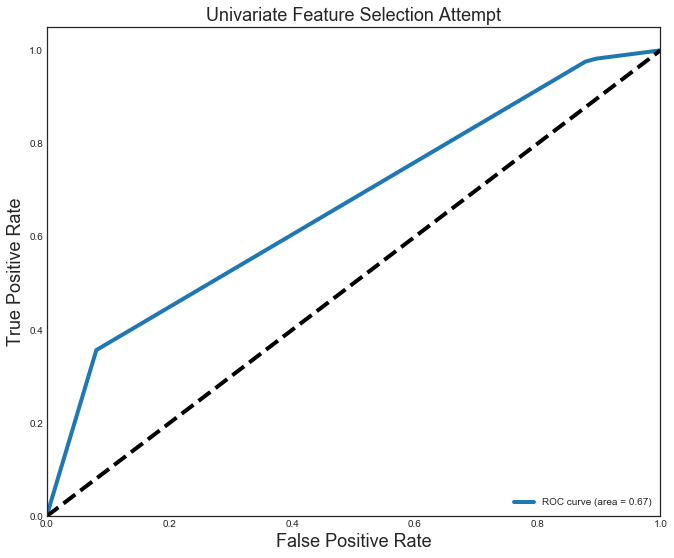

In [679]:
plt.style.use('seaborn-white')
%matplotlib inline


Y_score = clf.decision_function(X_test)

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Univariate Feature Selection Attempt', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [1065]:
withoutsal1=totaldf1.loc[:, totaldf1.columns != 'Salary'].reset_index(drop=True)

In [1066]:
data_vals=withoutsal1[['AZ', 'CO', 'CT', 'DC', 'FL', 'GA', 'MA', 'MD', 'MO', 'NC', 'NJ', 'NY',
       'OR', 'TX', 'VA', 'WA', 'Stars', 'Job Title Length',
       'Contains The Word Data', 'Title Contains Entry',
       'Title Contains Junior', 'Title Contains Associate', 'Salary Mean',
       'Senior & Lead Titles']]
target_data=totaldf1['low or high salary']

In [1067]:
data_vals['intercept']=1.0

In [1068]:
scaler = StandardScaler()
scaler.fit(data_vals)
StandardScaler(copy=True, with_mean=True, with_std=True)
(scaler.mean_)
print(scaler.transform(data_vals))

[[ 4.38586455 -0.33834615 -0.24181437 ...  1.         -0.52022437
   0.        ]
 [ 4.38586455 -0.33834615 -0.24181437 ...  1.         -0.52022437
   0.        ]
 [ 4.38586455 -0.33834615 -0.24181437 ...  1.         -0.52022437
   0.        ]
 ...
 [-0.22800522 -0.33834615 -0.24181437 ...  1.         -0.52022437
   0.        ]
 [-0.22800522 -0.33834615 -0.24181437 ...  1.         -0.52022437
   0.        ]
 [-0.22800522 -0.33834615 -0.24181437 ...  1.         -0.52022437
   0.        ]]


## My last attempt I really tried to follow all of the possible steps of trying to make the original dataframe run effiecently. I compromised feature selection to really make this run at a working model a step by step process on fitting and running the model and subsequently checking to  probablility of predection and score of said model.

In [1077]:
X=data_vals
y=target_data
y=np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.50)

In [1078]:
clf = LogisticRegression(solver='lbfgs')
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [1079]:
clf.score(X, y)

0.5073370738023306

In [1080]:
y.mean()

0.4926629261976694

In [1084]:
pd.DataFrame(list(zip(X.columns, np.transpose(clf.coef_))))

0                          1
0                         AZ  [-3.4403574094357256e-10]
1                         CO   [-4.300358492679595e-10]
2                         CT  [-1.5742690998232332e-11]
3                         DC   [1.0890686087892855e-10]
4                         FL  [-1.0390389395700824e-09]
5                         GA   [1.0867389569780965e-11]
6                         MA   [3.3565093891181973e-10]
7                         MD    [7.781876309033707e-11]
8                         MO  [-4.1407686248024053e-10]
9                         NC   [-3.802154360093349e-10]
10                        NJ    [5.663274799813422e-11]
11                        NY     [9.11018527964272e-10]
12                        OR  [-1.5106642538480743e-11]
13                        TX   [1.9343141563866172e-10]
14                        VA    [4.211247516608483e-10]
15                        WA    [5.082191782683604e-10]
16                     Stars    [7.230773769329223e-10]
17          Job Title Length   [4.7655010657764776e-09]
18    Contains The Word Data   [1.7916877197838906e-09]
19      Title Contains Entry   [-5.343645696900631e-11]
20     Title Contains Junior  [-1.1496376502469818e-10]
21  Title Contains Associate  [-1.5445592351223638e-10]
22               Salary Mean  [-2.9040573960654787e-07]
23      Senior & Lead Titles   [1.8851689285666875e-09]
24                 intercept   [-2.871483299060551e-12]

In [1085]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [1087]:
predicted = model2.predict(X_test)
print(predicted)

[1 0 1 ... 0 0 0]


In [1089]:
probs = model2.predict_proba(X_test)
print(probs)

[[0.44421601 0.55578399]
 [0.57171125 0.42828875]
 [0.25029081 0.74970919]
 ...
 [0.75819209 0.24180791]
 [0.53089945 0.46910055]
 [0.58594211 0.41405789]]


In [1091]:
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.7181883537023724
0.7677271825068642


In [1096]:
cm=print(metrics.confusion_matrix(y_test, predicted))

[[524 164]
 [228 475]]


In [1097]:
print(metrics.classification_report(y_test, predicted))

             precision    recall  f1-score   support

          0       0.70      0.76      0.73       688
          1       0.74      0.68      0.71       703

avg / total       0.72      0.72      0.72      1391



In [1105]:
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.68172043 0.6012931  0.59913793 0.47732181 0.5161987  0.54859611
 0.47516199 0.44276458 0.79049676 0.68682505]
0.5819516475389422


In [1106]:
score = clf.score(X_test, y_test)
print(score)

0.49460819554277496


## Conclusion
### The scraping and cleaning of the data went well I think I could have added more features using NLP methods from the summaries to give me a better idea of what a made a job a high or low salary. The feature selection could have been better it would have optimized the model and I could have come away with just a few features to really tell a story. The score of 74% wasn't the worst score possible so in the future spending more time with the feature selection based on the model score and just plain EDA will help me and the audience gain something that they take away from the project